In [85]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
# import seaborn as sns
from pathlib import Path
import pandas_datareader as web
import requests
from dotenv import load_dotenv
import os
import pprint
from pytrends.request import TrendReq
import matplotlib.pyplot as plt


In [3]:
# Read the Historical financial Data
p = web.get_data_yahoo(['^GSPC','CL=F','BTC-USD'], '10/31/2017', interval='d')
p = p.iloc[:, [0,1,2]]
p

Attributes    Adj Close                         
Symbols           ^GSPC       CL=F       BTC-USD
Date                                            
2017-10-31  2575.260010  54.380001   6468.399902
2017-11-01  2579.360107  54.299999   6767.310059
2017-11-02  2579.850098  54.540001   7078.500000
2017-11-03  2587.840088  55.639999   7207.759766
2017-11-04          NaN        NaN   7379.950195
...                 ...        ...           ...
2022-11-11  3992.929932  88.959999  17034.292969
2022-11-12          NaN        NaN  16799.185547
2022-11-13          NaN        NaN  16353.365234
2022-11-14  3957.250000  85.870003  16618.199219
2022-11-15          NaN  84.820000  16969.744141

[1842 rows x 3 columns]

In [4]:
#Count nulls
p.isnull().sum()

Attributes  Symbols
Adj Close   ^GSPC      573
            CL=F       570
            BTC-USD      0
dtype: int64

In [5]:
# Drop nulls
p.dropna(inplace=True)
p.isnull().sum()

Attributes  Symbols
Adj Close   ^GSPC      0
            CL=F       0
            BTC-USD    0
dtype: int64

In [6]:
# Reading Weather Data
weather_data_path = Path('./weather_data_4years.csv')
weather_df = pd.read_csv(weather_data_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
weather_df.head()

,High_Temp,Low_Temp
Date,,
2018-10-31,17.5,7.3
2018-11-01,19.9,13.3
2018-11-02,20.4,17.6
2018-11-03,18.9,10.6
2018-11-04,13.5,7.6


In [7]:
# Add  Average Temp 
col = weather_df.loc[:,"High_Temp":"Low_Temp" ]
weather_df['Average_Temp'] = col.mean(axis=1)
# new_weather_df = weather_df[["High_Temp","Low_Temp"]].mean()
weather_df.head()


,High_Temp,Low_Temp,Average_Temp
Date,,,
2018-10-31,17.5,7.3,12.40
2018-11-01,19.9,13.3,16.60
2018-11-02,20.4,17.6,19.00
2018-11-03,18.9,10.6,14.75
2018-11-04,13.5,7.6,10.55


In [8]:
weather_df.dtypes

High_Temp       float64
Low_Temp        float64
Average_Temp    float64
dtype: object

In [9]:
p_returns = p.pct_change(fill_method="ffill")
p_returns.head()

Attributes Adj Close                    
Symbols        ^GSPC      CL=F   BTC-USD
Date                                    
2017-10-31       NaN       NaN       NaN
2017-11-01  0.001592 -0.001471  0.046211
2017-11-02  0.000190  0.004420  0.045984
2017-11-03  0.003097  0.020169  0.018261
2017-11-06  0.001271  0.030733 -0.025667

In [10]:
p_returns.dropna(inplace=True)
p_returns.isnull().sum()

Attributes  Symbols
Adj Close   ^GSPC      0
            CL=F       0
            BTC-USD    0
dtype: int64

In [11]:
p_returns.columns = [' '.join(col).strip() for col in p.columns.values]
columns = ["sp_500", "WTI", "BTC"]
p_returns.columns = columns
p_returns

,sp_500,WTI,BTC
Date,,,
2017-11-01,0.001592,-0.001471,0.046211
2017-11-02,0.000190,0.004420,0.045984
2017-11-03,0.003097,0.020169,0.018261
2017-11-06,0.001271,0.030733,-0.025667
2017-11-07,-0.000189,-0.002615,0.017318
...,...,...,...
2022-11-08,0.005598,-0.031376,-0.100061
2022-11-09,-0.020778,-0.034642,-0.143490
2022-11-10,0.055434,0.007457,0.107425


In [12]:
# concate with weather data
commined_weather_df = pd.concat([p_returns, weather_df['Average_Temp'],], axis="columns", join="inner")
commined_weather_df.head()

,sp_500,WTI,BTC,Average_Temp
Date,,,,
2018-10-31,0.010851,-0.013146,-0.002630,12.40
2018-11-01,0.010558,-0.024805,0.009524,16.60
2018-11-02,-0.006317,-0.008636,0.001671,19.00
2018-11-05,0.005600,-0.000634,0.004887,11.00
2018-11-06,0.006259,-0.014105,0.006441,12.95
...,...,...,...,...
2022-10-24,0.011882,-0.005526,0.009029,14.75
2022-10-25,0.016267,0.008749,0.038783,18.80
2022-10-26,-0.007388,0.030356,0.033568,19.40


<AxesSubplot:xlabel='Date'>

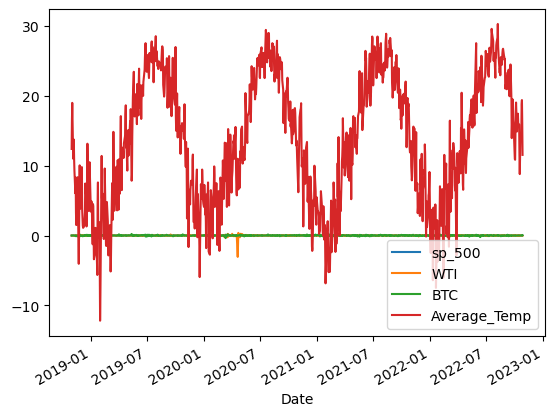

In [17]:
commined_weather_df.plot()

Text(0, 0.5, 'Average_Temp')

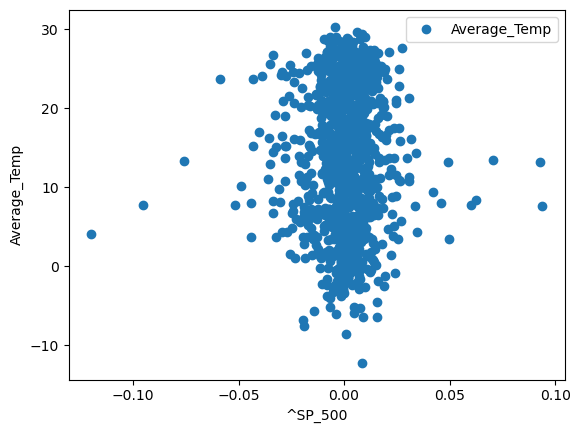

In [104]:
import matplotlib.pyplot as plt
commined_weather_df.plot(x='sp_500', y= 'Average_Temp', style= 'o')
plt.xlabel ('^SP_500')
plt.ylabel ('Average_Temp')
# plt.show


In [38]:
# Use pytrends to collect sentiment data

pytrends = TrendReq(hl='en-US', tz=360)


# sets sp500 to keyword
kw_list = ["s&p 500"]
pytrends.build_payload(kw_list, cat=0, timeframe='2021-10-31 2022-10-28', geo='', gprop='')

In [58]:
from pytrends import dailydata

sp500_trends1 = dailydata.get_daily_data('s&p 500', 2022, 9, 2022, 11, geo='US')

s&p 500:2022-09-01 2022-09-30
s&p 500:2022-10-01 2022-10-31
s&p 500:2022-11-01 2022-11-30


In [60]:
sp500_trends1

,s&p 500_unscaled,s&p 500_monthly,isPartial,scale,s&p 500
date,,,,,
2022-09-01,66,66,False,0.66,43.56
2022-09-02,61,61,False,0.61,37.21
2022-09-03,24,24,False,0.24,5.76
2022-09-04,14,14,False,0.14,1.96
2022-09-05,18,18,False,0.18,3.24
...,...,...,...,...,...
2022-11-07,70,60,False,0.60,42.00
2022-11-08,72,61,False,0.61,43.92
2022-11-09,72,62,False,0.62,44.64


In [61]:
sp500_trends2 = dailydata.get_daily_data('s&p 500', 2022, 6, 2022, 8, geo='US')
sp500_trends2

s&p 500:2022-06-01 2022-06-30
s&p 500:2022-07-01 2022-07-31
s&p 500:2022-08-01 2022-08-31


,s&p 500_unscaled,s&p 500_monthly,isPartial,scale,s&p 500
date,,,,,
2022-06-01,51,51,False,0.51,26.01
2022-06-02,45,45,False,0.45,20.25
2022-06-03,47,47,False,0.47,22.09
2022-06-04,16,16,False,0.16,2.56
2022-06-05,12,12,False,0.12,1.44
...,...,...,...,...,...
2022-08-27,31,18,False,0.18,5.58
2022-08-28,24,13,False,0.13,3.12
2022-08-29,90,51,False,0.51,45.90


In [91]:
sp500_trends3 = dailydata.get_daily_data('s&p 500', 2022, 3, 2022, 5, geo='US')
sp500_trends3

s&p 500:2022-03-01 2022-03-31
s&p 500:2022-04-01 2022-04-30
s&p 500:2022-05-01 2022-05-31


KeyError: "['isPartial'] not found in axis"

In [81]:
# Concatinate the 3 sp500_trends dataframes
trends_sp500_combined = pd.concat([sp500_trends1, sp500_trends2, sp500_trends3], axis='rows', join='inner')
trends_sp500_combined.sort_index(ascending=True, inplace=True)
trends_sp500_combined.drop(columns=['s&p 500_unscaled', 's&p 500_monthly', 'isPartial', 'scale'], inplace=True)
trends_sp500_combined.columns = ['sentiment_score_sp_500']



In [82]:
trends_sp500_combined

,sentiment_score_sp_500
date,
2022-02-01,28.09
2022-02-02,26.01
2022-02-03,30.25
2022-02-04,29.16
2022-02-05,4.41
...,...
2022-11-07,42.00
2022-11-08,43.92
2022-11-09,44.64


In [89]:
# Concatinate trends dataframe with the assets dataframe
assets_plus_sp500sentiment_dataframe = pd.concat([commined_weather_df, trends_sp500_combined], axis='columns', join='inner')
assets_plus_sp500sentiment_dataframe

,sp_500,WTI,BTC,Average_Temp,sentiment_score_sp_500
2022-02-01,0.006863,0.000567,0.006760,-0.05,28.09
2022-02-02,0.009423,0.000680,-0.046209,3.50,26.01
2022-02-03,-0.024391,0.022774,0.005456,7.05,30.25
2022-02-04,0.005157,0.022599,0.116978,4.95,29.16
2022-02-07,-0.003702,-0.010725,0.056370,1.40,23.04
...,...,...,...,...,...
2022-10-24,0.011882,-0.005526,0.009029,14.75,42.70
2022-10-25,0.016267,0.008749,0.038783,18.80,58.22
2022-10-26,-0.007388,0.030356,0.033568,19.40,62.16
2022-10-27,-0.006083,0.013309,-0.023331,16.15,53.04


<function matplotlib.pyplot.show(close=None, block=None)>

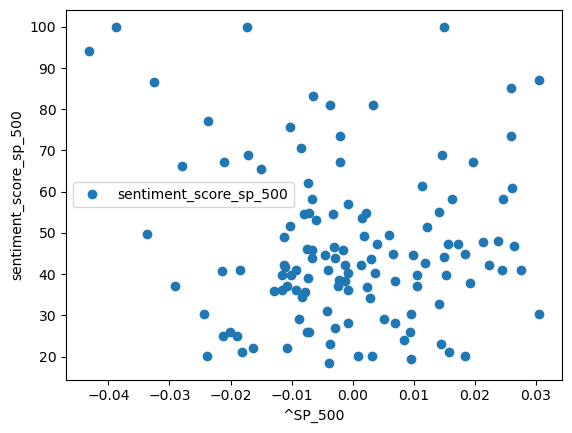

In [90]:
# Sentiment graph
assets_plus_sp500sentiment_dataframe.plot(x='sp_500', y= 'sentiment_score_sp_500', style= 'o')
plt.xlabel ('^SP_500')
plt.ylabel ('sentiment_score_sp_500')
plt.show

In [87]:
oil_trends1 = dailydata.get_daily_data('WTI', 2022, 9, 2022, 11, geo='US')
oil_trends1

WTI:2022-09-01 2022-09-30
WTI:2022-10-01 2022-10-31
WTI:2022-11-01 2022-11-30


,WTI_unscaled,WTI_monthly,isPartial,scale,WTI
date,,,,,
2022-09-01,81,64,False,0.64,51.84
2022-09-02,59,47,False,0.47,27.73
2022-09-03,19,15,False,0.15,2.85
2022-09-04,29,22,False,0.22,6.38
2022-09-05,60,47,False,0.47,28.20
...,...,...,...,...,...
2022-11-07,83,41,False,0.41,34.03
2022-11-08,99,49,False,0.49,48.51
2022-11-09,98,48,False,0.48,47.04


In [93]:
oil_trends2 = dailydata.get_daily_data('WTI', 2022, 6, 2022, 8, geo='US')
oil_trends2

WTI:2022-06-01 2022-06-30
WTI:2022-07-01 2022-07-31
WTI:2022-08-01 2022-08-31


,WTI_unscaled,WTI_monthly,isPartial,scale,WTI
date,,,,,
2022-06-01,65,43,False,0.43,27.95
2022-06-02,93,61,False,0.61,56.73
2022-06-03,66,43,False,0.43,28.38
2022-06-04,33,21,False,0.21,6.93
2022-06-05,31,20,False,0.20,6.20
...,...,...,...,...,...
2022-08-27,25,14,False,0.14,3.50
2022-08-28,15,8,False,0.08,1.20
2022-08-29,68,37,False,0.37,25.16


In [95]:
oil_trends3 = dailydata.get_daily_data('WTI', 2022, 3, 2022, 5, geo='US')
oil_trends3

WTI:2022-03-01 2022-03-31
WTI:2022-04-01 2022-04-30
WTI:2022-05-01 2022-05-31


,WTI_unscaled,WTI_monthly,isPartial,scale,WTI
date,,,,,
2022-03-01,46,46,False,0.46,21.16
2022-03-02,58,58,False,0.58,33.64
2022-03-03,49,49,False,0.49,24.01
2022-03-04,53,53,False,0.53,28.09
2022-03-05,22,22,False,0.22,4.84
...,...,...,...,...,...
2022-05-27,51,16,False,0.16,8.16
2022-05-28,19,6,False,0.06,1.14
2022-05-29,14,4,False,0.04,0.56


In [96]:
trends_WTI_combined = pd.concat([oil_trends1, oil_trends2, oil_trends3], axis='rows', join='inner')
trends_WTI_combined.sort_index(ascending=True, inplace=True)
trends_WTI_combined.drop(columns=['WTI_unscaled', 'WTI_monthly', 'isPartial', 'scale'], inplace=True)
trends_WTI_combined.columns = ['sentiment_score_WTI']

In [97]:
assets_plus_WTIsentiment_dataframe = pd.concat([commined_weather_df, trends_WTI_combined], axis='columns', join='inner')
assets_plus_WTIsentiment_dataframe

,sp_500,WTI,BTC,Average_Temp,sentiment_score_WTI
2022-03-01,-0.015474,0.080339,0.026889,3.80,21.16
2022-03-02,0.018643,0.069529,-0.009706,7.35,33.64
2022-03-03,-0.005255,-0.026492,-0.033520,1.65,24.01
2022-03-04,-0.007934,0.074394,-0.078069,-1.60,28.09
2022-03-07,-0.029518,0.032158,-0.027482,16.45,100.00
...,...,...,...,...,...
2022-10-24,0.011882,-0.005526,0.009029,14.75,17.64
2022-10-25,0.016267,0.008749,0.038783,18.80,21.16
2022-10-26,-0.007388,0.030356,0.033568,19.40,26.01
2022-10-27,-0.006083,0.013309,-0.023331,16.15,21.16


<function matplotlib.pyplot.show(close=None, block=None)>

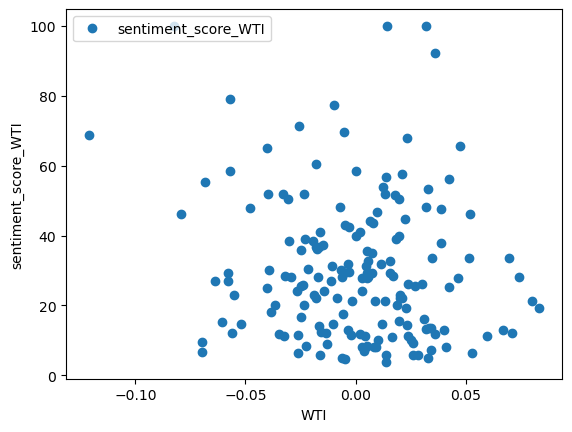

In [98]:
# Sentiment graph
assets_plus_WTIsentiment_dataframe.plot(x='WTI', y= 'sentiment_score_WTI', style= 'o')
plt.xlabel ('WTI')
plt.ylabel ('sentiment_score_WTI')
plt.show

In [100]:
abs_p = p.copy()
abs_p.columns = [' '.join(col).strip() for col in p.columns.values]
columns = ["sp_500", "WTI", "BTC"]
abs_p.columns = columns
abs_p

,sp_500,WTI,BTC
Date,,,
2017-10-31,2575.260010,54.380001,6468.399902
2017-11-01,2579.360107,54.299999,6767.310059
2017-11-02,2579.850098,54.540001,7078.500000
2017-11-03,2587.840088,55.639999,7207.759766
2017-11-06,2591.129883,57.349998,7022.759766
...,...,...,...
2022-11-08,3828.110107,88.910004,18541.271484
2022-11-09,3748.570068,85.830002,15880.780273
2022-11-10,3956.370117,86.470001,17586.771484


In [101]:
# Testing WTI sentiment correlations with absolute price of the ETF vs pct_change()
abs_price_sentiment_correlation_df = pd.concat([abs_p['WTI'], trends_WTI_combined], axis="columns", join="inner")
abs_price_sentiment_correlation_df

,WTI,sentiment_score_WTI
2022-03-01,103.410004,21.16
2022-03-02,110.599998,33.64
2022-03-03,107.669998,24.01
2022-03-04,115.680000,28.09
2022-03-07,119.400002,100.00
...,...,...
2022-11-07,91.790001,34.03
2022-11-08,88.910004,48.51
2022-11-09,85.830002,47.04
2022-11-10,86.470001,24.50


<function matplotlib.pyplot.show(close=None, block=None)>

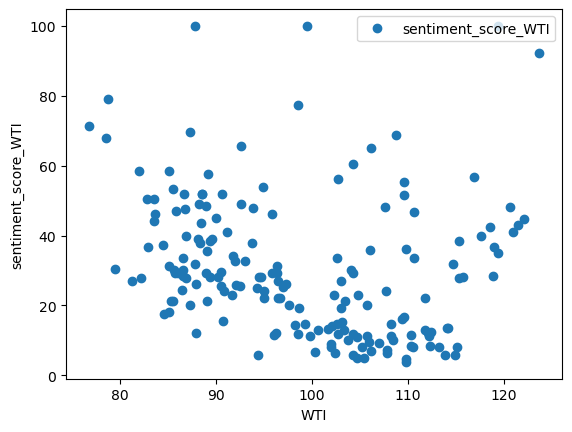

In [102]:
# Sentiment graph
abs_price_sentiment_correlation_df.plot(x='WTI', y= 'sentiment_score_WTI', style= 'o')
plt.xlabel ('WTI')
plt.ylabel ('sentiment_score_WTI')
plt.show